## Locations of Recycling bins in NYC

In [1]:
# import all dependencies
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float
from config import gkey

In [2]:
# import the csv to dataframe
recycle_bin = "Resources_Y/Public_Recycling_Bins.csv"
bin_df = pd.read_csv(recycle_bin)
bin_df.head()

,Borough,Site type,Park/Site Name,Address,Latitude,Longitude
0,Bronx,Subproperty,227th St. Plgd,E 227 St/Bronx River Pkway,40.890849,-73.864224
1,Bronx,Subproperty,Allerton Ballfields,Allerton Ave & Moshulu Pkway,40.848891,-73.877128
2,Bronx,Outdoor,Arthur Ave & E 187 St,Arthur Ave & 187 St,40.855570,-73.887565
3,Bronx,Outdoor,Barstow Mansion,"895 Shore Road, Pelham Bay Park",40.871864,-73.805549
4,Bronx,Subproperty,Bradley Playground,2001-2017 Bronx Park E,40.851889,-73.868549


In [3]:
# clean up the dataframe, drop all of na 
bin_df2 = bin_df.dropna()
bin_df2.head()

,Borough,Site type,Park/Site Name,Address,Latitude,Longitude
0,Bronx,Subproperty,227th St. Plgd,E 227 St/Bronx River Pkway,40.890849,-73.864224
1,Bronx,Subproperty,Allerton Ballfields,Allerton Ave & Moshulu Pkway,40.848891,-73.877128
2,Bronx,Outdoor,Arthur Ave & E 187 St,Arthur Ave & 187 St,40.855570,-73.887565
3,Bronx,Outdoor,Barstow Mansion,"895 Shore Road, Pelham Bay Park",40.871864,-73.805549
4,Bronx,Subproperty,Bradley Playground,2001-2017 Bronx Park E,40.851889,-73.868549


In [4]:
# mySQL workbench database
connection_string = "root:password@localhost:3306/nyc_recycle_db"
engine = create_engine(f'mysql+pymysql://{connection_string}')
Base.metadata.create_all(engine)
engine.table_names()

['nyc_waste_capture_rate',
 'nyc_waste_capture_summary',
 'public_recycling_bins']

In [5]:
# import Session to handle database
from sqlalchemy.orm import Session
engine.execute('select * from public_recycling_bins').fetchall()

[('Bronx', 'Subproperty', '227th St. Plgd', 'E 227 St/Bronx River Pkway', 40.89084899, -73.86422392),
 ('Bronx', 'Subproperty', 'Allerton Ballfields', 'Allerton Ave & Moshulu Pkway', 40.84889079, -73.87712839),
 ('Bronx', 'Outdoor', 'Arthur Ave & E 187 St', 'Arthur Ave & 187 St', 40.85557, -73.887565),
 ('Bronx', 'Outdoor ', 'Barstow Mansion', '895 Shore Road, Pelham Bay Park', 40.871864, -73.805549),
 ('Bronx', 'Subproperty', 'Bradley Playground', '2001-2017 Bronx Park E', 40.851889, -73.868549),
 ('Bronx', 'Outdoor', 'Bronx Botanical Gardens', 'Visitors Service Center', 40.861526, -73.880659),
 ('Bronx', 'Outdoor', 'Bronx Botanical Gardens', 'Visitors Service Center', 40.860755, -73.880423),
 ('Bronx', 'Outdoor', 'Bronx Botanical Gardens', 'Visitors Service Center', 40.859644, -73.880472),
 ('Bronx', 'Outdoor', 'Bronx Botanical Gardens', 'Visitors Service Center', 40.862602, -73.880171),
 ('Bronx', 'Outdoor', 'Bronx County Courthouse', '161 ST/Grand Concourse', 40.826939, -73.922314)

## NYC recycling capturing rate

In [6]:
%matplotlib notebook
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
import csv
import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float

In [7]:
#import csv to dataframe
csv_file = "Resources/NYC_recycle_data.csv"
recycle_data_df = pd.read_csv(csv_file)
recycle_data_df.head()

,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100
0,Brooklyn North,BKN01,10.0,2008.0,April,60.688074,39.331263,38.087160,424.301097
1,Brooklyn North,BKN02,10.0,2008.0,April,67.941406,37.829364,49.102305,406.543898
2,Brooklyn North,BKN03,10.0,2008.0,April,51.098349,24.442502,33.028304,298.577351
3,Brooklyn North,BKN04,10.0,2008.0,April,55.356564,24.767962,44.149040,348.465214
4,Brooklyn North,BKN05,10.0,2008.0,April,51.042098,26.338451,40.130607,293.722364


In [8]:
# Create a filtered dataframe from specific columns
nyc_capture_data_df = recycle_data_df[["Zone", "District", "Fiscal Year","Month Name","Diversion Rate-Total (Total Recycling / Total Waste)","Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100"]].copy()
nyc_capture_data_df.head()

# Rename the column headers
nyc_capture_transformed = nyc_capture_data_df.rename(columns={"Diversion Rate-Total (Total Recycling / Total Waste)": "Total_recycle_vs_Total_waste",
                                                          "Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100": "Total_capture_rate"})

# Clean the data with correct format
nyc_capture_transformed['Fiscal Year'] = nyc_capture_transformed['Fiscal Year'].apply(lambda x: round(x))
grouped_nyc_capture = nyc_capture_transformed.groupby(['Zone','Fiscal Year']).mean()
#level=0, inplace=True
grouped_nyc_capture.reset_index(level=['Zone', 'Fiscal Year'], inplace=True)
grouped_nyc_capture.index = range(84)
grouped_nyc_capture.head(50)
#create index here for the grouped_nyc_capture before uploading to sql
#create two graph one by year and one by zone

,Zone,Fiscal Year,Total_recycle_vs_Total_waste,Total_capture_rate
0,Bronx,2008,56.740229,389.467678
1,Bronx,2009,57.429473,401.907312
2,Bronx,2010,56.865101,393.812421
3,Bronx,2011,57.039201,398.988018
4,Bronx,2012,57.186434,401.923463
5,Bronx,2013,57.652235,408.463701
6,Bronx,2014,58.220699,414.715387
7,Bronx,2015,58.456376,415.246276
8,Bronx,2016,57.741242,397.993123
9,Bronx,2017,57.724221,395.787272


In [9]:
# save the output file path
grouped_nyc_capture.to_csv("nyc_capture_summary_output.csv", sep='\t')

<IPython.core.display.Javascript object>


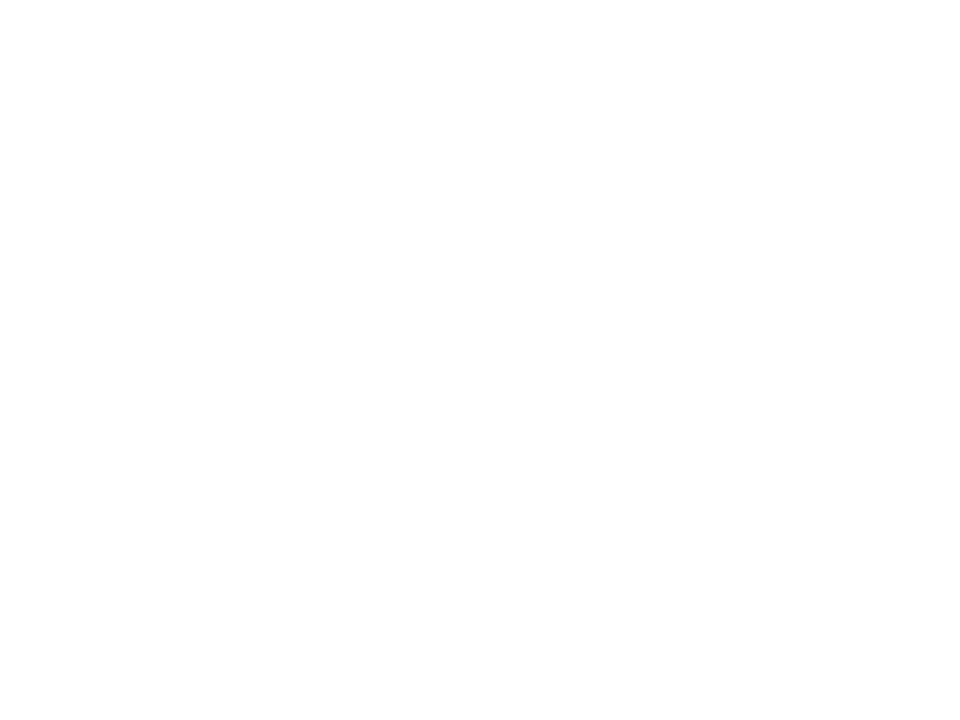

No handles with labels found to put in legend.


In [10]:

#fiscal_year_list = grouped_nyc_capture['Fiscal Year']
#x_axis = fiscal_year_list.unique()
#print(len(x_axis))

#plot by fiscal year 

grouped_nyc_capture_by_year = nyc_capture_transformed.groupby(['Fiscal Year']).mean()
#level=0, inplace=True
grouped_nyc_capture_by_year.reset_index(level=['Fiscal Year'], inplace=True)
#grouped_nyc_capture_by_year.index = range(84)
grouped_nyc_capture_by_year.head(50)
x_years = np.array(grouped_nyc_capture_by_year['Fiscal Year'].unique())
total_waste = np.array(grouped_nyc_capture_by_year['Total_recycle_vs_Total_waste'])
plt.bar(x_years, total_waste, color='r', alpha=0.5, align="edge")
plt.title("Fiscal Year Vs Total_recycle/Total_waste ")
plt.legend()
plt.xlabel("Fiscal Year")
plt.ylabel("Total_recycle/Total_waste")
plt.ylim(45,90)
plt.savefig("Images/Fiscal_Year_vs_Total_Recyle.png")
plt.show()

In [11]:
#plot by zone

grouped_nyc_capture_by_zone = nyc_capture_transformed.groupby(['Zone']).mean()
#level=0, inplace=True
grouped_nyc_capture_by_zone.reset_index(level=['Zone'], inplace=True)
#grouped_nyc_capture_by_year.index = range(84)
grouped_nyc_capture_by_zone.head(50)
x_years_z = np.array(grouped_nyc_capture_by_zone['Zone'].unique())
total_waste_z = np.array(grouped_nyc_capture_by_zone['Total_recycle_vs_Total_waste'])
plt.bar(x_years_z, total_waste_z, color='r', alpha=0.5, align="edge")
plt.ylim(45,90)
plt.xticks(rotation=90)
plt.title("NY Zone Vs Total_recycle/Total_waste ")
plt.legend()
plt.xlabel("Zone")
plt.ylabel("Total_recycle/Total_waste")
plt.savefig("Images/NY_Zone_vs_Total_Recyle.png")
plt.show()

No handles with labels found to put in legend.


In [12]:
#write to mysql workbench database
connection_string = "root:password@localhost:3306/nyc_recycle_db"
engine = create_engine(f'mysql+pymysql://{connection_string}')
# Confirm tables
#Base.metadata.create_all(engine)
engine.table_names()

['nyc_waste_capture_rate',
 'nyc_waste_capture_summary',
 'public_recycling_bins']

In [13]:
# The ORM’s “handle” to the database is the Session.
from sqlalchemy.orm import Session
session = Session(engine)
# The ORM’s “handle” to the database is the Session.
from sqlalchemy.orm import Session
engine.execute('select * from nyc_waste_capture_rate').fetchall()

[(0, 'Brooklyn North', 'BKN01', 2008, 'April', 60.6880742089563, 424.301096979533),
 (1, 'Brooklyn North', 'BKN02', 2008, 'April', 67.9414058051355, 406.543897955661),
 (2, 'Brooklyn North', 'BKN03', 2008, 'April', 51.0983489665718, 298.577351413774),
 (3, 'Brooklyn North', 'BKN04', 2008, 'April', 55.3565636016721, 348.465213935367),
 (4, 'Brooklyn North', 'BKN05', 2008, 'April', 51.0420983125947, 293.722364243606),
 (5, 'Brooklyn North', 'BKN08', 2008, 'April', 61.2897627682849, 430.255471855415),
 (6, 'Brooklyn North', 'BKN09', 2008, 'April', 53.1040695926325, 309.703291109575),
 (7, 'Brooklyn North', 'BKN16', 2008, 'April', 45.5547599816586, 242.341104152752),
 (8, 'Brooklyn North', 'BKN17', 2008, 'April', 59.2985769899713, 383.206887434095),
 (9, 'Brooklyn South', 'BKS06', 2008, 'April', 77.3618083705989, 583.789883085096),
 (10, 'Brooklyn South', 'BKS07', 2008, 'April', 70.210166803323, 577.773702091813),
 (11, 'Brooklyn South', 'BKS10', 2008, 'April', 72.2449871649751, 617.480451

In [14]:
#Add data to sql table
nyc_capture_transformed.to_sql(con=engine, name='nyc_waste_capture_rate', if_exists='append')
grouped_nyc_capture.to_sql(con=engine, name='nyc_waste_capture_summary', if_exists='append')

## Electronic recycle facilities locations in NYC 

In [15]:
import os
from sqlalchemy import create_engine
import requests
import json
import gmaps
from census import Census
%matplotlib notebook
import numpy as np
import pandas as pd
from config import gkey

In [16]:
#import csv to dataframe
csv_file = "Recycle_facilities.csv"
recycle_facilities_df = pd.read_csv(csv_file)
recycle_facilities_df.head()

,Facility Name,Registration Number,County,Street Address,City,State,Zip Code,Contact Name,Phone Number,Extension,Website,Location 1
0,Jerge's Used Auto Parts Inc.,1033,Allegany,7708 County Road 26,Belfast,NY,14711,Annette Kish,585-365-2758,NaN,NaN,"7708 County Road\nBelfast, NY 14711"
1,"Elemet, Inc.",1213,Columbia,1 Industrial Tract,Hudson,NY,12534,Alex Delia,518-828-4136,5.0,NaN,"1 Industrial\nHudson, NY 12534"
2,Ombligo Inc.,120,Kings,"4014 1st Avenue, 5th Floor SW, Unit 16",Brooklyn,NY,11232,Michael Epp,718-384-0796,NaN,http://www.ombligo.com,NaN
3,E-Scrap of Syracuse,1192,Onondaga,1759 Route 11,Tully,NY,13159,Joe D'Agostino,315-382-7885,NaN,http://www.e-scrap.co,"1759 Route\nTully, NY 13159"
4,"Green Chip, Inc.",1210,Queens,19-36 38th Street,Astoria,NY,11105,Lee Srokosz,718-349-2620,NaN,NaN,"19 36 38th Street\nAstoria, NY 11105"


In [17]:
# Build the endpoint URL
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format("NY", gkey)

In [18]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

In [19]:
# Run a request to endpoint and convert result to json
geo_data = requests.get(target_url).json()

# Print the json
print(geo_data)

{'results': [{'address_components': [{'long_name': 'New York', 'short_name': 'New York', 'types': ['locality', 'political']}, {'long_name': 'New York', 'short_name': 'NY', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}], 'formatted_address': 'New York, NY, USA', 'geometry': {'bounds': {'northeast': {'lat': 40.9175771, 'lng': -73.70027209999999}, 'southwest': {'lat': 40.4773991, 'lng': -74.25908989999999}}, 'location': {'lat': 40.7127753, 'lng': -74.0059728}, 'location_type': 'APPROXIMATE', 'viewport': {'northeast': {'lat': 40.9175771, 'lng': -73.70027209999999}, 'southwest': {'lat': 40.4773991, 'lng': -74.25908989999999}}}, 'place_id': 'ChIJOwg_06VPwokRYv534QaPC8g', 'types': ['locality', 'political']}], 'status': 'OK'}


In [20]:
lat_list = []    
lon_list = []

for index, row in recycle_facilities_df.iterrows():
#     print(row['Street Address'], row['City'],row['State'],row['Zip Code'])
# Make API call
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(f'{row["Street Address"]},{row["City"]},{row["State"]}', gkey)
   # print (target_url)
    geo_data1 = requests.get(target_url).json()
    lat = geo_data1["results"][0]["geometry"]["location"]["lat"]
    lon = geo_data1["results"][0]["geometry"]["location"]["lng"]
    lat_list.append(lat)
    lon_list.append(lon)

In [21]:
#Add lat column to dataframe
lat_column = pd.Series(lat_list)
recycle_facilities_df1 = recycle_facilities_df.assign(lat=lat_column)
recycle_facilities_df1 

,Facility Name,Registration Number,County,Street Address,City,State,Zip Code,Contact Name,Phone Number,Extension,Website,Location 1,lat
0,Jerge's Used Auto Parts Inc.,1033,Allegany,7708 County Road 26,Belfast,NY,14711,Annette Kish,585-365-2758,NaN,NaN,"7708 County Road\nBelfast, NY 14711",42.335675
1,"Elemet, Inc.",1213,Columbia,1 Industrial Tract,Hudson,NY,12534,Alex Delia,518-828-4136,5.0,NaN,"1 Industrial\nHudson, NY 12534",42.247499
2,Ombligo Inc.,120,Kings,"4014 1st Avenue, 5th Floor SW, Unit 16",Brooklyn,NY,11232,Michael Epp,718-384-0796,NaN,http://www.ombligo.com,NaN,40.656051
3,E-Scrap of Syracuse,1192,Onondaga,1759 Route 11,Tully,NY,13159,Joe D'Agostino,315-382-7885,NaN,http://www.e-scrap.co,"1759 Route\nTully, NY 13159",42.857372
4,"Green Chip, Inc.",1210,Queens,19-36 38th Street,Astoria,NY,11105,Lee Srokosz,718-349-2620,NaN,NaN,"19 36 38th Street\nAstoria, NY 11105",40.778110
5,Prince Metal,34,Queens,37-90 Railroad Avenue,New York,NY,11101,Rick Hwang,347-541-6899,NaN,http://www.PrinceMetal.com,"37 90 Railroad Avenue\nNew York, NY 11101",40.731755
6,"The 4th Bin, Inc.",23,Queens,35-10 10th Street,Long Island City,NY,11106,Michael Deutsch,646-747-5987,NaN,http://www.4thbin.com,"35 10 10th Street\nLong Island City, NY 11106",40.762837
7,Maryhaven Center of Hope,777,Suffolk,445 County Road 101,Yaphank,NY,11980,John Mahoney,631-924-5900,NaN,http://www.maryhaven.chsli.org,"445 County Road\nYaphank, NY 11980",40.814686
8,"Edison Electronics, Inc.",402,Otsego,"5375 State Highway 7, Suite 1",Oneonta,NY,13820,Ahren Edison,607-432-9311,NaN,NaN,"5375 State Highway 7\nOneonta, NY 13820\n(42.4...",42.457366
9,eWorks ESI AHRC Suffolk,977,Suffolk,55 Crossway East,Bohemia,NY,11716,Natale Leo,631-585-0100,NaN,http://www.eworksesi.org,"55 Crossway East\nBohemia, NY 11716\n(40.78680...",40.787033


In [22]:
#Add lat column to dataframe
lgn_column = pd.Series(lon_list)
recycle_facilities_df2 = recycle_facilities_df1.assign(lgn=lgn_column)
recycle_facilities_df2

,Facility Name,Registration Number,County,Street Address,City,State,Zip Code,Contact Name,Phone Number,Extension,Website,Location 1,lat,lgn
0,Jerge's Used Auto Parts Inc.,1033,Allegany,7708 County Road 26,Belfast,NY,14711,Annette Kish,585-365-2758,NaN,NaN,"7708 County Road\nBelfast, NY 14711",42.335675,-78.098038
1,"Elemet, Inc.",1213,Columbia,1 Industrial Tract,Hudson,NY,12534,Alex Delia,518-828-4136,5.0,NaN,"1 Industrial\nHudson, NY 12534",42.247499,-73.761023
2,Ombligo Inc.,120,Kings,"4014 1st Avenue, 5th Floor SW, Unit 16",Brooklyn,NY,11232,Michael Epp,718-384-0796,NaN,http://www.ombligo.com,NaN,40.656051,-74.014446
3,E-Scrap of Syracuse,1192,Onondaga,1759 Route 11,Tully,NY,13159,Joe D'Agostino,315-382-7885,NaN,http://www.e-scrap.co,"1759 Route\nTully, NY 13159",42.857372,-76.116512
4,"Green Chip, Inc.",1210,Queens,19-36 38th Street,Astoria,NY,11105,Lee Srokosz,718-349-2620,NaN,NaN,"19 36 38th Street\nAstoria, NY 11105",40.778110,-73.901328
5,Prince Metal,34,Queens,37-90 Railroad Avenue,New York,NY,11101,Rick Hwang,347-541-6899,NaN,http://www.PrinceMetal.com,"37 90 Railroad Avenue\nNew York, NY 11101",40.731755,-73.937748
6,"The 4th Bin, Inc.",23,Queens,35-10 10th Street,Long Island City,NY,11106,Michael Deutsch,646-747-5987,NaN,http://www.4thbin.com,"35 10 10th Street\nLong Island City, NY 11106",40.762837,-73.940124
7,Maryhaven Center of Hope,777,Suffolk,445 County Road 101,Yaphank,NY,11980,John Mahoney,631-924-5900,NaN,http://www.maryhaven.chsli.org,"445 County Road\nYaphank, NY 11980",40.814686,-72.948312
8,"Edison Electronics, Inc.",402,Otsego,"5375 State Highway 7, Suite 1",Oneonta,NY,13820,Ahren Edison,607-432-9311,NaN,NaN,"5375 State Highway 7\nOneonta, NY 13820\n(42.4...",42.457366,-75.035423
9,eWorks ESI AHRC Suffolk,977,Suffolk,55 Crossway East,Bohemia,NY,11716,Natale Leo,631-585-0100,NaN,http://www.eworksesi.org,"55 Crossway East\nBohemia, NY 11716\n(40.78680...",40.787033,-73.145010


In [23]:
#drop NaN from Location 1
recycle_facilities_df3 = recycle_facilities_df2.dropna(subset=['Location 1'])
recycle_facilities_df3

,Facility Name,Registration Number,County,Street Address,City,State,Zip Code,Contact Name,Phone Number,Extension,Website,Location 1,lat,lgn
0,Jerge's Used Auto Parts Inc.,1033,Allegany,7708 County Road 26,Belfast,NY,14711,Annette Kish,585-365-2758,NaN,NaN,"7708 County Road\nBelfast, NY 14711",42.335675,-78.098038
1,"Elemet, Inc.",1213,Columbia,1 Industrial Tract,Hudson,NY,12534,Alex Delia,518-828-4136,5.0,NaN,"1 Industrial\nHudson, NY 12534",42.247499,-73.761023
3,E-Scrap of Syracuse,1192,Onondaga,1759 Route 11,Tully,NY,13159,Joe D'Agostino,315-382-7885,NaN,http://www.e-scrap.co,"1759 Route\nTully, NY 13159",42.857372,-76.116512
4,"Green Chip, Inc.",1210,Queens,19-36 38th Street,Astoria,NY,11105,Lee Srokosz,718-349-2620,NaN,NaN,"19 36 38th Street\nAstoria, NY 11105",40.778110,-73.901328
5,Prince Metal,34,Queens,37-90 Railroad Avenue,New York,NY,11101,Rick Hwang,347-541-6899,NaN,http://www.PrinceMetal.com,"37 90 Railroad Avenue\nNew York, NY 11101",40.731755,-73.937748
6,"The 4th Bin, Inc.",23,Queens,35-10 10th Street,Long Island City,NY,11106,Michael Deutsch,646-747-5987,NaN,http://www.4thbin.com,"35 10 10th Street\nLong Island City, NY 11106",40.762837,-73.940124
7,Maryhaven Center of Hope,777,Suffolk,445 County Road 101,Yaphank,NY,11980,John Mahoney,631-924-5900,NaN,http://www.maryhaven.chsli.org,"445 County Road\nYaphank, NY 11980",40.814686,-72.948312
8,"Edison Electronics, Inc.",402,Otsego,"5375 State Highway 7, Suite 1",Oneonta,NY,13820,Ahren Edison,607-432-9311,NaN,NaN,"5375 State Highway 7\nOneonta, NY 13820\n(42.4...",42.457366,-75.035423
9,eWorks ESI AHRC Suffolk,977,Suffolk,55 Crossway East,Bohemia,NY,11716,Natale Leo,631-585-0100,NaN,http://www.eworksesi.org,"55 Crossway East\nBohemia, NY 11716\n(40.78680...",40.787033,-73.145010
10,Advanced Technology Recycling,1060,Erie,200 Fire Tower Drive,Tonawanda,NY,14150,Barb Ehresman,716-693-7779,NaN,http://www.atrecycle.com,"200 Fire Tower Drive\nTonawanda, NY 14150\n(42...",42.991380,-78.908226


In [24]:
# Save the revised Data Frame as a csv
recycle_facilities_df3.to_csv(
    "../trang/recycle_facilities_cleanup.csv", encoding="utf-8", index=False)

In [25]:
# Store 'Lat' and 'Lng' into  locations to map
locations = recycle_facilities_df3[["lat", "lgn"]].astype(float)

In [26]:
# Map
lat_lng = gmaps.symbol_layer(locations, fill_color='red', 
                                  stroke_color='red', scale = 2)
fig = gmaps.figure()
fig.add_layer(lat_lng)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#write to mysql workbench database
connection_string = "root:password@localhost:3306/nyc_recycle_db"
engine = create_engine(f'mysql+pymysql://{connection_string}')
# Confirm tables
#Base.metadata.create_all(engine)
engine.table_names()

['nyc_waste_capture_rate',
 'nyc_waste_capture_summary',
 'public_recycling_bins',
 'recycle_facilities_cleanup']

In [28]:
#Add data to sql table
recycle_facilities_df3.to_sql(con=engine, name='recycle_facilities_cleanup', if_exists='append')
